In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
import joblib
from scipy import sparse
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,cross_validate, KFold
from sklearn.metrics import mean_squared_error 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc, classification_report,accuracy_score,precision_score,f1_score,recall_score,cohen_kappa_score,multilabel_confusion_matrix,make_scorer

In [2]:
# load data 
dataframe = pd.read_csv(r'C:\Users\dawns\Desktop\Master thesis\data\Features_level.csv')
#data=dataframe[['CONTENT_NEW','','SCORE']].copy()
df_data=dataframe[['CONTENT_NEW','WORDCUT','SCORE','LEVEL','Tokens','level1_tokens','level2_tokens','level3_tokens','level4_tokens','level5_tokens','level6_tokens','level7_tokens','char_num','high_level','primary_level','Connective_ratio','connective_SCORE','pre','connective_numbers']].copy()
df_data.shape

(3668, 19)

In [3]:
# Generating 'y' for classification as well as regression
y = df_data['SCORE']

In [4]:

# generating x 
pre = df_data['pre']
# Tokenization
def preprocessing_sentence(x):
    words = jieba.cut(str(x).strip())
    return ' '.join(words)

In [5]:
# load tf-idf vector
vector = joblib.load(r'E:\All codes\Master code\vector.pkl') 
vector.shape


(3668, 36035)

In [6]:
# 特征合并 feature concatenate 
feature_set1 = df_data[['connective_SCORE',]]
feature_set2 = vector
print(feature_set1.shape)
print(feature_set2.shape)
train_features = sparse.hstack((feature_set2, feature_set1))
print('=============')
print(train_features.shape)

(3668, 1)
(3668, 36035)
(3668, 36036)


In [7]:
# 划分训练集 ，测试集 train_test split
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)

(2934, 36036)
(2934,)


In [8]:
# support vector machine classfier
model = OneVsRestClassifier(svm.SVC(kernel='rbf',gamma='scale'))#linear
clt = model.fit(x_train,y_train)
y_pred = clt.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
train_score = clt.score(x_train, y_train)
print("Train Accuracy:", train_score)
print("================================================")
print("Test Accuracy:", test_score)
print("================================================")
acc_for_each_class = metrics.precision_score(y_test,y_pred,average=None)
print("acc_for_each_class:\n",acc_for_each_class)
print("================================================")
qwkappa = cohen_kappa_score(y_test,y_pred,weights='quadratic')
print("qwkappa:\n",qwkappa)
print("================================================")
print('Weighted precision', precision_score(y_test, y_pred, average='weighted'))
print('Weighted recall', recall_score(y_test, y_pred, average='weighted'))
print('Weighted f1-score', f1_score(y_test, y_pred, average='weighted'))
print("================================================")

Train Accuracy: 0.9897750511247444
Test Accuracy: 0.27520435967302453
acc_for_each_class:
 [1.         1.         0.         0.19230769 0.20930233 0.19626168
 0.35055351 0.29850746 0.12       0.20689655 0.39285714 0.        ]
qwkappa:
 0.5396810013434027
Weighted precision 0.2591504233910066
Weighted recall 0.27520435967302453
Weighted f1-score 0.2555745542647669


In [9]:
classification_rep = classification_report(y_test,y_pred)
print("classification report: \n",classification_rep)

classification report: 
               precision    recall  f1-score   support

          40       1.00      0.40      0.57         5
          45       1.00      0.17      0.29         6
          50       0.00      0.00      0.00        15
          55       0.19      0.09      0.13        53
          60       0.21      0.23      0.22        78
          65       0.20      0.23      0.21        93
          70       0.35      0.55      0.43       172
          75       0.30      0.21      0.25        94
          80       0.12      0.08      0.10        73
          85       0.21      0.16      0.18        76
          90       0.39      0.40      0.40        55
          95       0.00      0.00      0.00        14

    accuracy                           0.28       734
   macro avg       0.33      0.21      0.23       734
weighted avg       0.26      0.28      0.26       734



In [10]:
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print(confusion_mat)


[[ 2  0  0  1  0  0  2  0  0  0  0  0]
 [ 0  1  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  2  5  1  7  0  0  0  0  0]
 [ 0  0  1  5 14  9 19  2  3  0  0  0]
 [ 0  0  4  4 18 22 22  2  4  1  1  0]
 [ 0  0  1  8 19 21 29  7  6  2  0  0]
 [ 0  0  0  3 13 19 95 20 11  4  7  0]
 [ 0  0  0  1  2 12 42 20  3 11  2  1]
 [ 0  0  0  2  5 10 22  8  6 12  7  1]
 [ 0  0  0  0  2 10 23  6  8 12 14  1]
 [ 0  0  0  0  3  2  8  1  7 11 22  1]
 [ 0  0  0  0  0  1  2  1  2  5  3  0]]


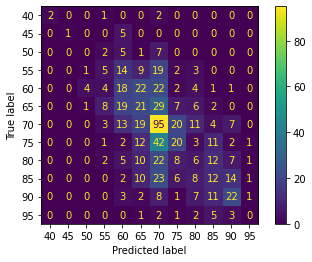

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [12]:
#xgboost  xgboost处理回归
model = xgb.XGBRegressor()
params = {'n_estimators': [160], 'learning_rate': [0.1]}
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('R2:',r2_score(y_test,y_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

R2: 0.39629813659518875
mean_squared_error: 75.6668967391132
mean_absolute_error: 6.865654771269504


In [13]:
df= pd.DataFrame(y_pred)
print(df.min())
print(df.max())
df[(df >= 95)]=95
df[(df >= 90) & (df <95)]=90
df[(df >= 85) & (df < 90)]=85
df[(df >= 80) & (df < 85)]=80
df[(df >= 75) & (df < 80)]=75
df[(df >= 70) & (df < 75)]=70
df[(df >= 65) & (df < 70)]=65
df[(df >= 60) & (df < 65)]=60
df[(df >= 55) & (df < 60)]=55
df[(df >= 50) & (df < 55)]=50
df[(df >= 45) & (df < 50)]=45
df[ (df < 45)]=40
qwkappa = cohen_kappa_score(y_test,y_pred,weights='quadratic')
print("qwkappa:\n",qwkappa)

0    45.341347
dtype: float32
0    99.933044
dtype: float32
qwkappa:
 0.5903029053721327


In [14]:
classification_rep = classification_report(y_test,y_pred)
print("classification report: \n",classification_rep)

classification report: 
               precision    recall  f1-score   support

          40       0.00      0.00      0.00         5
          45       0.30      0.50      0.37         6
          50       0.29      0.27      0.28        15
          55       0.32      0.23      0.26        53
          60       0.21      0.21      0.21        78
          65       0.15      0.25      0.19        93
          70       0.32      0.35      0.34       172
          75       0.18      0.29      0.22        94
          80       0.14      0.14      0.14        73
          85       0.27      0.11      0.15        76
          90       0.43      0.05      0.10        55
          95       0.00      0.00      0.00        14

    accuracy                           0.23       734
   macro avg       0.22      0.20      0.19       734
weighted avg       0.25      0.23      0.22       734



d:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[ 0  1  2  2  0  0  0  0  0  0  0  0]
 [ 0  3  2  0  0  1  0  0  0  0  0  0]
 [ 0  0  4  1  9  0  0  1  0  0  0  0]
 [ 0  3  3 12 13 15  4  3  0  0  0  0]
 [ 0  2  2  7 16 21 21  8  1  0  0  0]
 [ 0  1  1  7 21 23 23 10  6  1  0  0]
 [ 0  0  0  3  9 52 61 39  7  1  0  0]
 [ 0  0  0  1  1 16 36 27 10  3  0  0]
 [ 0  0  0  4  4 10 19 21 10  4  1  0]
 [ 0  0  0  1  2 10 13 19 21  8  2  0]
 [ 0  0  0  0  0  2 12 13 14  9  3  2]
 [ 0  0  0  0  0  0  0  6  3  4  1  0]]


In [16]:
acc_for_each_class = metrics.precision_score(y_test,y_pred,average=None)
print("acc_for_each_class:\n",acc_for_each_class)
test_score = accuracy_score(y_test, y_pred)
print("================================================")
print("Test Accuracy:", test_score)

acc_for_each_class:
 [0.         0.3        0.28571429 0.31578947 0.21333333 0.15333333
 0.32275132 0.18367347 0.13888889 0.26666667 0.42857143 0.        ]
Test Accuracy: 0.22752043596730245


d:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


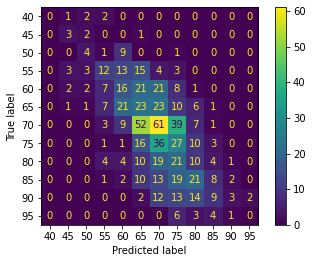

In [17]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()